In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('D:/emppred')

In [3]:
os.getcwd()

'D:\\emppred'

In [4]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
num = df.select_dtypes(exclude='object')
cat = df.select_dtypes(include="object")

In [10]:
num.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

<Axes: xlabel='age', ylabel='Count'>

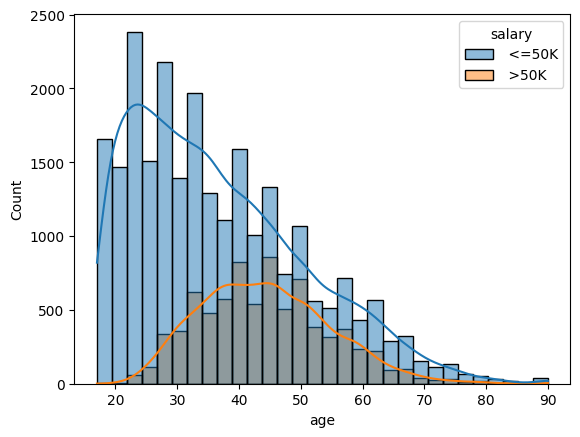

In [11]:
sns.histplot(data=df,x='age',hue='salary',kde=True,bins=30)

<Axes: xlabel='hours-per-week', ylabel='Count'>

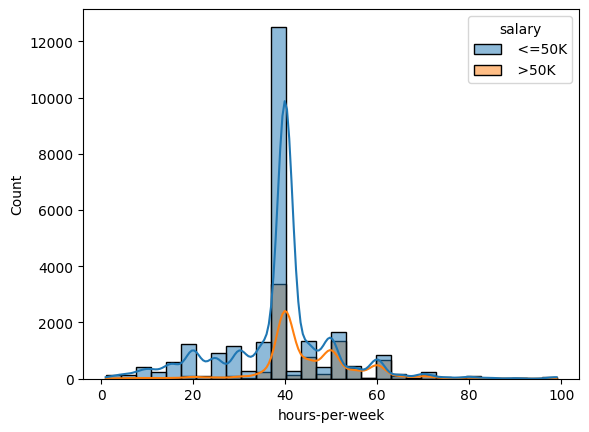

In [12]:
sns.histplot(data=df,x='hours-per-week',hue='salary',kde=True,bins=30)

<Axes: xlabel='fnlwgt', ylabel='Count'>

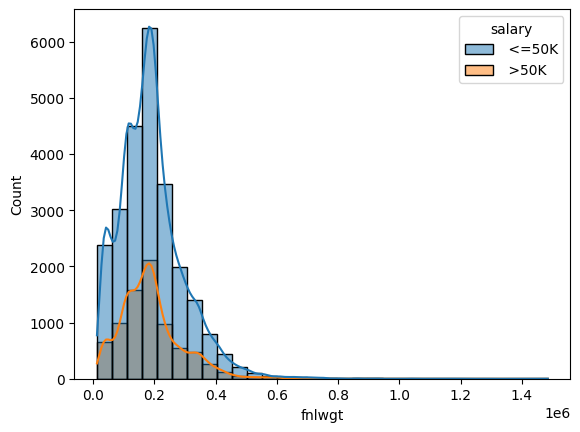

In [13]:
sns.histplot(data=df,x='fnlwgt',hue='salary',kde=True,bins=30)

<Axes: xlabel='salary', ylabel='count'>

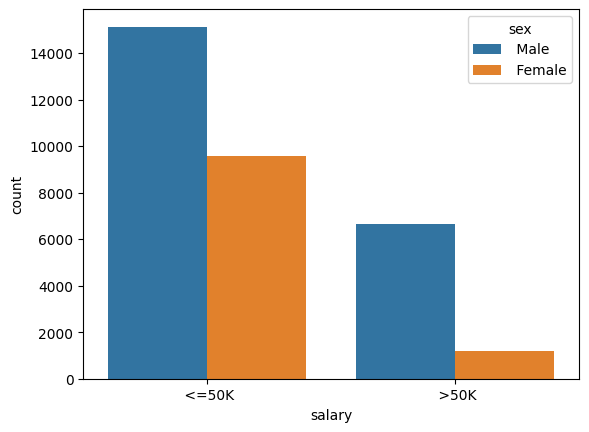

In [14]:
sns.countplot(data=df,x='salary',hue='sex')

<Axes: xlabel='salary', ylabel='count'>

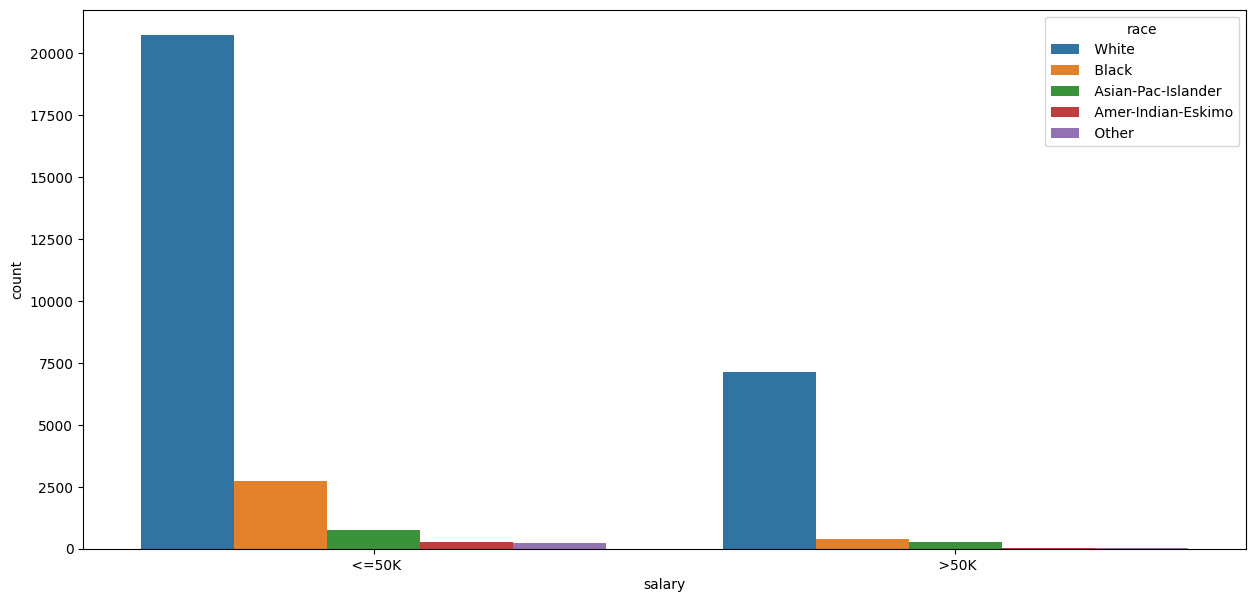

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='salary',hue='race')

<Axes: xlabel='salary', ylabel='count'>

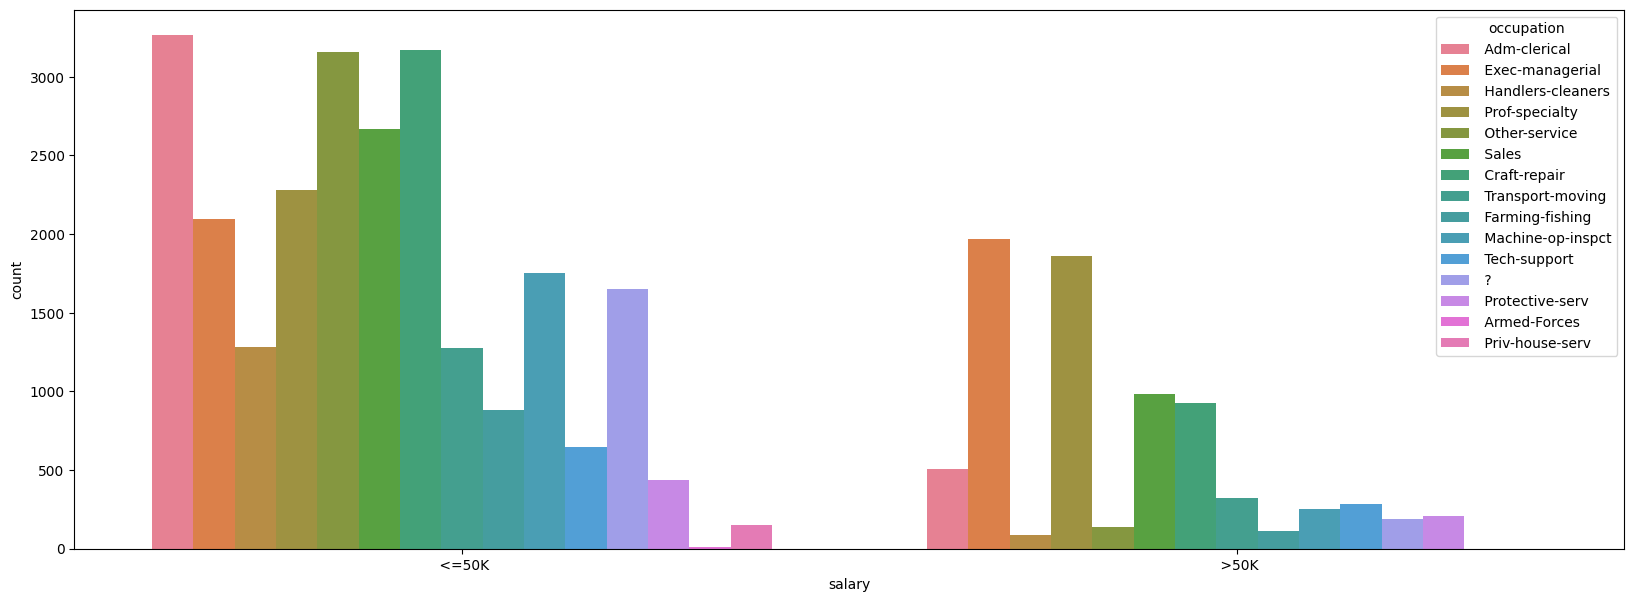

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='salary',hue='occupation')

<Axes: xlabel='salary', ylabel='count'>

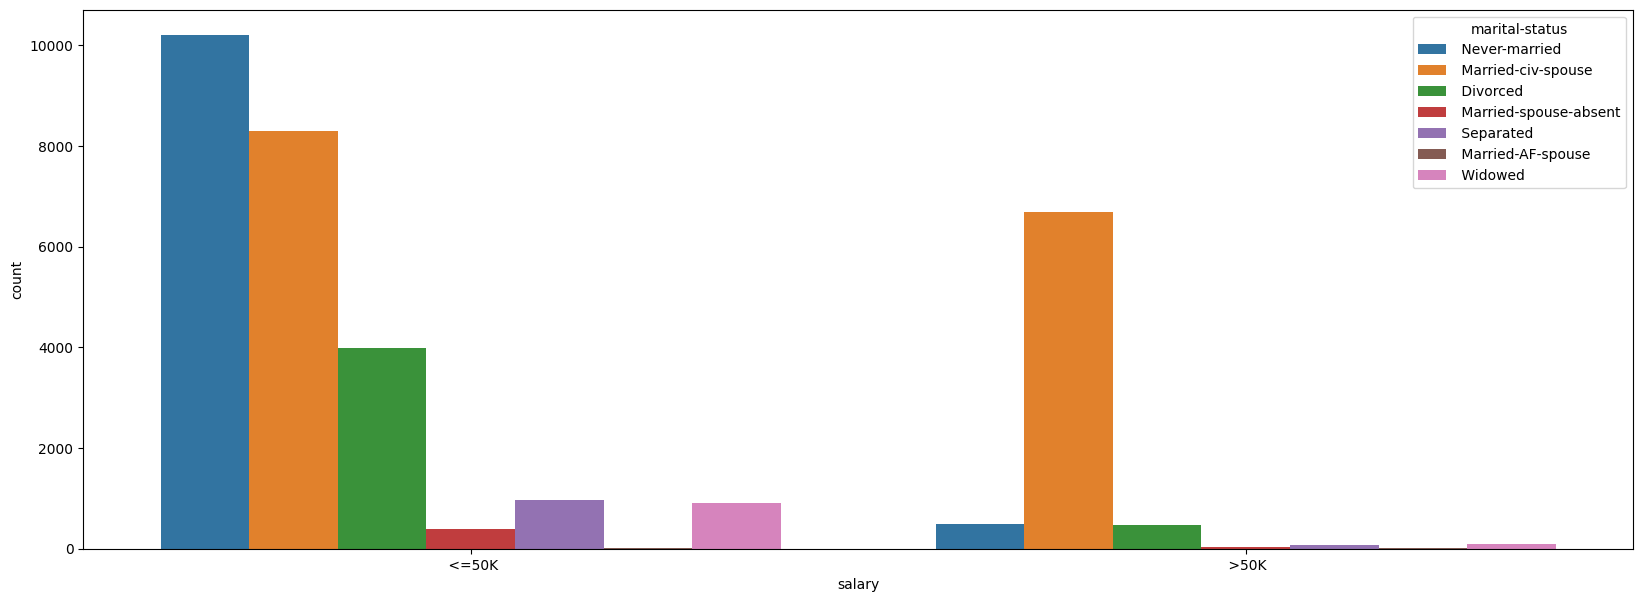

In [17]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='salary',hue='marital-status')

<Axes: xlabel='salary', ylabel='count'>

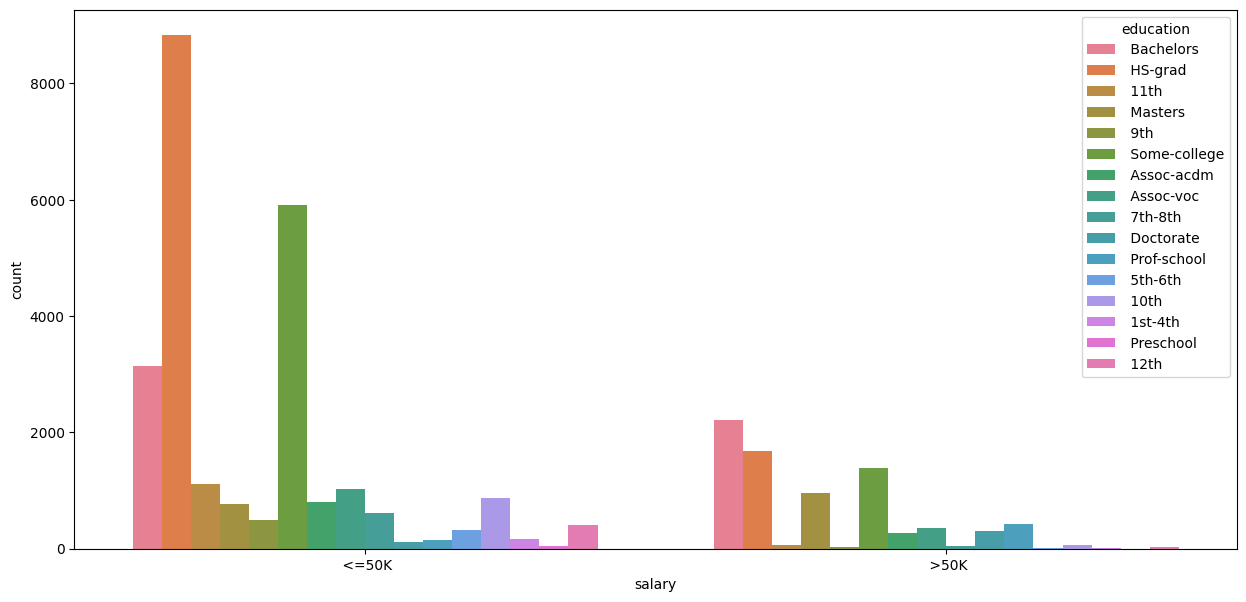

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(data=df,x='salary',hue='education')

In [19]:
#encoding
for column in cat.columns:
    df[column] = df[column].replace(' ?','other')

In [20]:
for column in df.columns:
    if df[column].dtype=="object":
        df[column] = df[column].str.replace(' ','')

In [21]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'other', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [22]:
df['country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'other', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['salary'] = encoder.fit_transform(df[['salary']])

d:\emppred\venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
categorical = df.select_dtypes(include="object")

In [27]:
for i in categorical.columns:
    print(df[i].unique())

['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'other' 'Self-emp-inc' 'Without-pay' 'Never-worked']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'other'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
['Male' 'Female']
['United-States' 'Cuba' 'Jamaica' 'India' 'other' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 

In [66]:
df.to_csv("artifacts/raw.csv",index=False)